# SOFIYA J
Task2 :Implement an image color detector which identifies all the colors in an 
image or video.


**Importing the libraries**

In [53]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
import matplotlib.pyplot as plt
%matplotlib inline

**Working with OpenCV**

The type of this input is <class 'numpy.ndarray'>
shape: (918, 1225, 3)


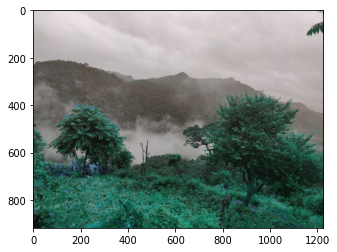

In [54]:
image = cv2.imread('image.jpeg')
print("The type of this input is {}".format(type(image)))
print("shape: {}".format(image.shape))
plt.imshow(image)

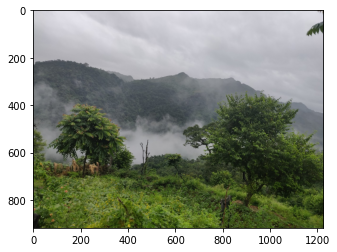

In [55]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Image converted into gray scale

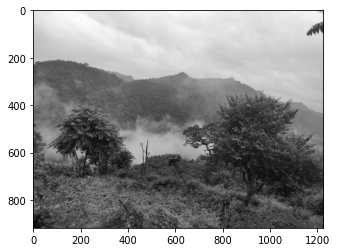

In [56]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

Resize the image

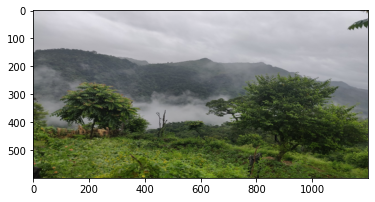

In [57]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

**Color Identification** 

RGB to Hex Conversion

In [58]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
 

Read image in RGB color space

In [59]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

Get colors from an image

In [60]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([28.71249392, 37.44389532, 19.05983002]),
 array([178.9548545 , 179.52417732, 185.95915148]),
 array([82.86145895, 89.57215265, 90.75965679]),
 array([107.29013517, 122.8395779 ,  55.65064027]),
 array([206.02996331, 205.71806128, 213.20987821]),
 array([53.09657544, 65.63807387, 32.72567669]),
 array([119.82326593, 124.30756761, 123.99398515]),
 array([76.68277184, 93.3982392 , 38.10390855])]

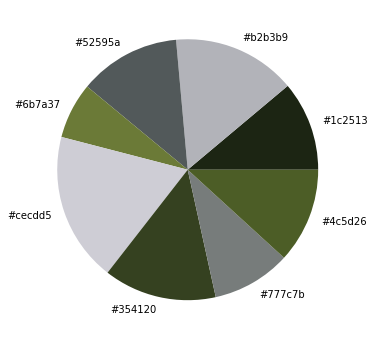

In [61]:
get_colors(get_image('image.jpeg'), 8, True)

**Search Images using color**

Get all images

In [62]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

Show all images

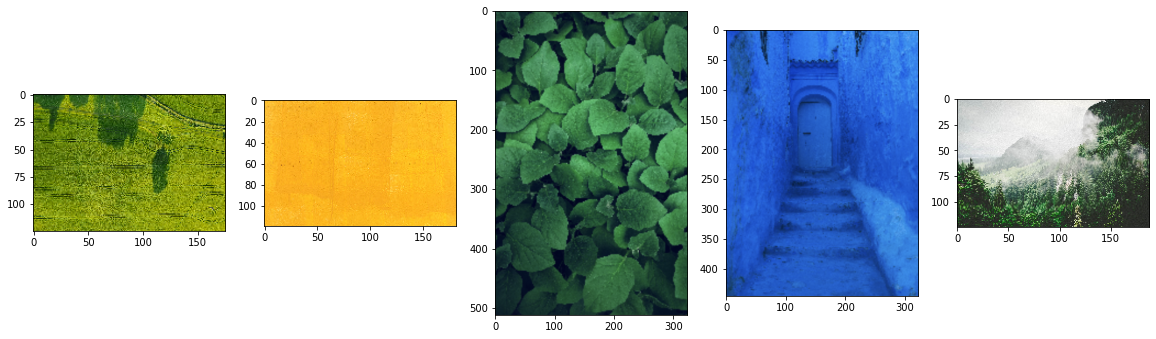

In [63]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

Match Images with color

In [64]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

Show selected images

In [65]:
def show_selected_images(images, color, threshold, color_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        color_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

Searching for Green

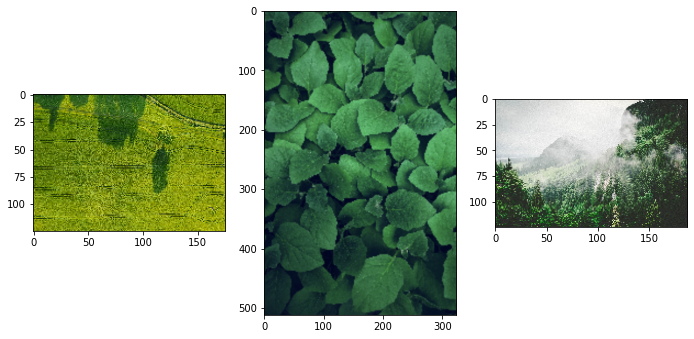

In [66]:
plt.figure(figsize = (20, 10))
show_selected_images(images,COLORS['GREEN'], 60, 5)

Searching for Blue

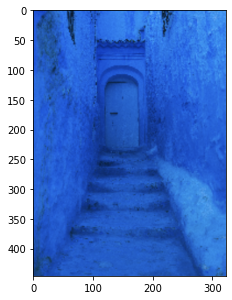

In [67]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

Searching for Yellow

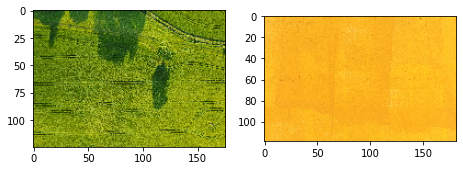

In [68]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)